In [0]:
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('Agg')
%matplotlib inline
import random as random
import numpy as np
import csv

现在假设有10个x_data和y_data，x和y之间的关系是y_data=b+w*x_data。b，w都是参数，是需要学习出来的。现在我们来练习用梯度下降找到b和w。

In [0]:
#假設X,Y有十筆
x_data = [ 338.,  333.,  328. , 207. , 226.  , 25. , 179. ,  60. , 208.,  606.]
y_data = [  640.  , 633. ,  619.  , 393.  , 428. ,   27.  , 193.  ,  66. ,  226. , 1591.]
#y_data = b+ w*xdata 用gd把g和w找出來

In [9]:
x = np.arange(-200,-100,1) #bias
y = np.arange(-5,5,0.1) #weight
Z =  np.zeros((len(x), len(y))) #弄一個100*100的Z存隨機的B 和 W 的 LOSS
print("x =")
print(x)
print("z =")
print(Z)
print(Z.shape)

x =
[-200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187
 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173
 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159
 -158 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145
 -144 -143 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131
 -130 -129 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117
 -116 -115 -114 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103
 -102 -101]
z =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 100)


In [10]:
X, Y = np.meshgrid(x, y)#產生網格矩陣 x =行數 y=列數
print(X)
print(X.shape)
print(Y)
print(Y.shape)

[[-200 -199 -198 ... -103 -102 -101]
 [-200 -199 -198 ... -103 -102 -101]
 [-200 -199 -198 ... -103 -102 -101]
 ...
 [-200 -199 -198 ... -103 -102 -101]
 [-200 -199 -198 ... -103 -102 -101]
 [-200 -199 -198 ... -103 -102 -101]]
(100, 100)
[[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 ...
 [ 4.7  4.7  4.7 ...  4.7  4.7  4.7]
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...  4.9  4.9  4.9]]
(100, 100)


In [11]:
count=0
for i in range(100):
  for j in range(100):
    count=count+1
print(count)

10000


In [12]:
#loss
 
# 雙層for循環，計算方差和的平均
#y_data = b+ w*xdata
for i in range(len(x)):
  for j in range(len(y)):
    b = x[i]
    w = y[j]   
    Z[j][i] = 0 
    for n in range(len(x_data)):#x_data =10
      Z[j][i] = Z[j][i] +  (y_data[n] - b - w*x_data[n])**2#現在b w是隨機初始的      
      if(i==0 and j==0):
        print(Z[j][i])
    if(i==0 and j==0):
      print("\n")
    Z[j][i] = Z[j][i]/len(x_data)#10筆做平均
    if(i==0 and j==0):
        print(Z[j][i])   

6400900.0
12640904.0
18687585.0
21337969.0
24428533.0
24552437.0
26211381.0
26531737.0
28680893.0
51922934.0


5192293.4


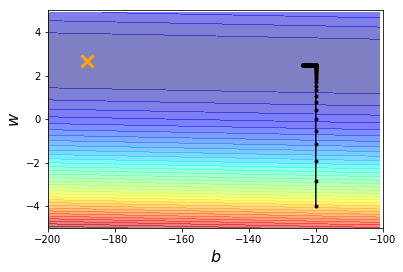

In [45]:
# ydata = b + w * xdata # linear regression
b = -120 # initial b
w = -4 # initial w
lr = 0.0000001 # learning rate
iteration = 100000#在每個iteration，計算b,w對loss的偏微分



# Store initial values for plotting.
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    
    b_grad = 0.0#b的偏微分
    w_grad = 0.0
    for n in range(len(x_data)):#x_data =10
      # 計算w和b的偏導數
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    

    # Update parameters.
    b = b - lr * b_grad 
    w = w - lr * w_grad
    # Store parameters for plotting# 每更新一次存儲更新的w和b
    b_history.append(b)
    w_history.append(w)

# plot the figure
# contour函數畫等高線圖
# contourf函數對等高線間的填充區域進行填充（使用不同的顏色），並將不會再繪製等高線（顯然不同的顏色分界就表示等高線本身）
# 即以等高線區間色塊形式顯示
# alpha=0.5表示透明度50%。50代表的是顯示等高線的密集程度，數值越大，畫的等高線數就越多。
# cmap即color map
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
# plt.plot(x,y,format_string,**kwargs) x軸數據，y軸數據，format_string控制曲線的格式字串,format_string有顏色字符，風格字符和標記字符
# 'x'表示x形標記，color='orange'爲橙色，markeredgewidth爲標記的線段的寬度，ms爲markersize標記大小，lw爲linewidth線寬
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)# 設置x軸刻度範圍-200到-100

plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)# 設置x軸和y軸的標籤和標籤的大小

plt.ylabel(r'$w$', fontsize=16)
plt.show()